**Tema:** Análisis de la composición corporal y porcentaje de grasa corporal

**Dataset:** bodyfat_metrico.csv

**Objetivo:** Obtener insights sobre los factores que más influyen en el porcentaje de grasa corporal, a partir de variables físicas (peso, altura, medidas, edad, etc.).

**Abstract**

En este proyecto se analiza un conjunto de datos con mediciones corporales y porcentaje de grasa corporal. El objetivo es identificar qué variables físicas (como peso, edad o perímetros corporales) están más relacionadas con el porcentaje de grasa.

Este análisis puede ser útil para profesionales del fitness, nutricionistas o personas interesadas en comprender cómo distintos factores influyen en la composición corporal.

**Hipótesis**

¿Existe una relación entre el IMC (Índice de Masa Corporal) y el porcentaje de grasa corporal?

¿El peso y la altura influyen significativamente en el porcentaje de grasa?

¿Qué medidas corporales (como cintura o abdomen) son mejores predictores del porcentaje de grasa?

¿La edad tiene correlación con el porcentaje de grasa corporal?

¿Qué grupos presentan mayor riesgo de grasa corporal elevada según sus características físicas?

**ESTRUCTURA DEL NOTEBOOK**

**Importación de librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="pastel", font_scale=1.1)


**Carga del dataset**

In [5]:
df = pd.read_csv("bodyfat_metrico.csv")

# Vista general
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Densidad          252 non-null    float64
 1   Porcentaje_Grasa  252 non-null    float64
 2   Edad              252 non-null    int64  
 3   Peso_lb           252 non-null    float64
 4   Altura_in         252 non-null    float64
 5   Cuello            252 non-null    float64
 6   Pecho             252 non-null    float64
 7   Abdomen           252 non-null    float64
 8   Cadera            252 non-null    float64
 9   Muslo             252 non-null    float64
 10  Rodilla           252 non-null    float64
 11  Tobillo           252 non-null    float64
 12  Bíceps            252 non-null    float64
 13  Antebrazo         252 non-null    float64
 14  Muñeca            252 non-null    float64
 15  Peso_kg           252 non-null    float64
 16  Altura_cm         252 non-null    float64
 1

,Densidad,Porcentaje_Grasa,Edad,Peso_lb,Altura_in,Cuello,Pecho,Abdomen,Cadera,Muslo,Rodilla,Tobillo,Bíceps,Antebrazo,Muñeca,Peso_kg,Altura_cm,IMC
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,81.158679,178.177976,25.942199
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,13.330688,9.303654,9.558451
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,53.750652,74.930000,18.017664
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,72.121128,173.355000,23.035661
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,80.058988,177.800000,25.094288
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,89.357624,183.515000,27.334547
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,164.721935,197.485000,165.618094


**Limpieza y transformación**

In [7]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Revisar valores nulos
df.isnull().sum()

# Si hay valores faltantes, imputar o eliminar
df = df.dropna()

# Crear nuevas variables útiles
df['IMC'] = df['Peso_kg'] / (df['Altura_cm']/100)**2

**Análisis exploratorio**

**Distribución general del porcentaje de grasa**

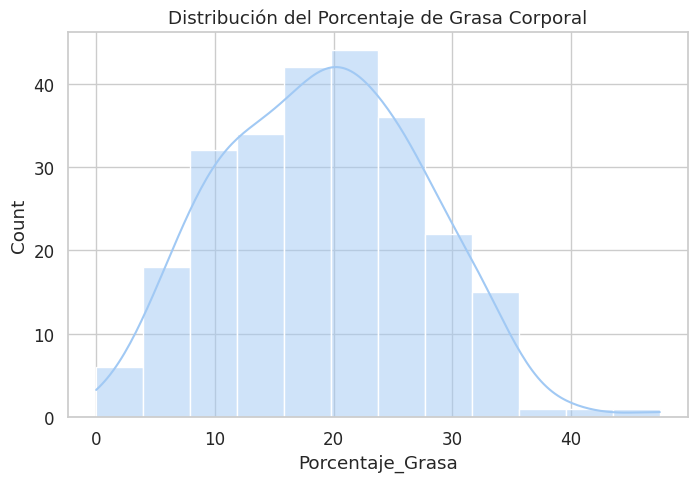

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Porcentaje_Grasa'], kde=True)
plt.title("Distribución del Porcentaje de Grasa Corporal")
plt.show()


**Relación entre IMC y grasa corporal**

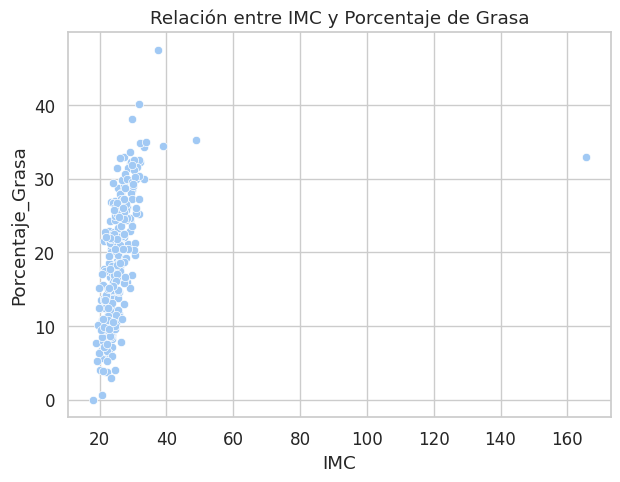

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='IMC', y='Porcentaje_Grasa')
plt.title("Relación entre IMC y Porcentaje de Grasa")
plt.show()


**Correlaciones entre variables**

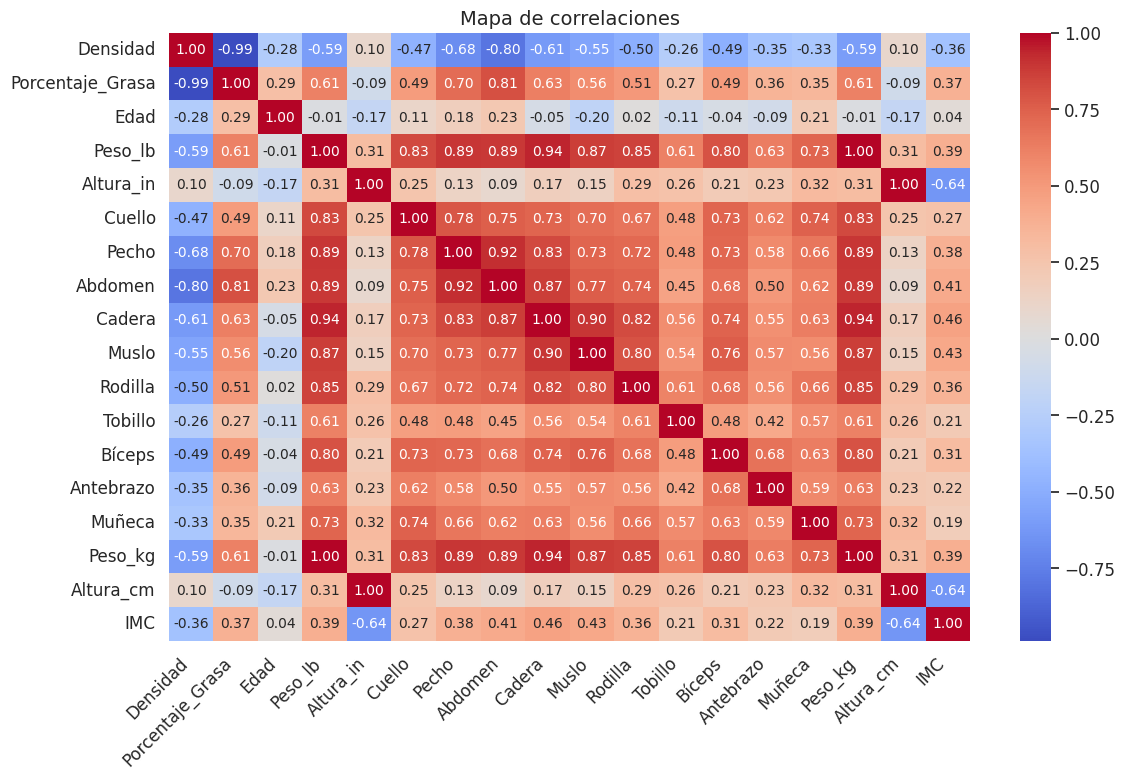

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm",
            annot_kws={"size":10})
plt.title("Mapa de correlaciones", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



**Grasa corporal por edad**

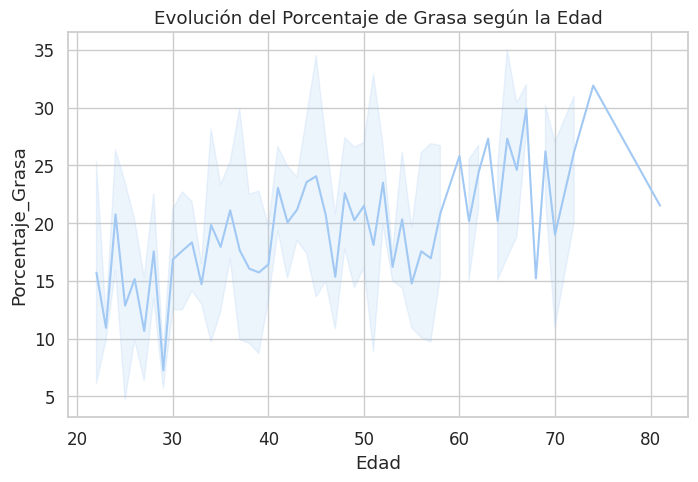

In [22]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Edad', y='Porcentaje_Grasa')
plt.title("Evolución del Porcentaje de Grasa según la Edad")
plt.show()


**Insights y conclusiones**

Existe una correlación fuerte entre el IMC y el porcentaje de grasa corporal, lo que confirma que el IMC puede ser un buen indicador general de composición corporal.

Las medidas del abdomen y cintura también muestran alta correlación con el porcentaje de grasa.

La edad presenta una tendencia leve al aumento del porcentaje de grasa con los años.

El análisis puede ayudar a profesionales de la salud a identificar riesgos asociados a la composición corporal.